In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
from docplex.mp.model import Model
# from NPG_CMDP import CMDP_NPG
# from ARNPG_CMDP import CMDP_ARNPG
from MARL import MARL_agent, MO_MARL

# Random Seed
np.random.seed(10)

In [18]:
from MARL import MARL_agent
n = 2
a = 3
s = 4
gamma = 0

A = a**n

# Randomly generated probability transition matrix P((s,a) -> s') in [0,1]^{|S||A| x |S|}
raw_transition = np.random.uniform(0, 1, size=(s * A, s))

# raw_transition = np.ones((s * A, s))
prob_transition = raw_transition / raw_transition.sum(axis=1, keepdims=1)

# Random positive rewards
reward = np.random.uniform(0, 1, size=(s * A))
rewards = [reward]

# Start state distribution
rho = np.ones(s) / s

100%|██████████| 1000/1000 [00:01<00:00, 891.86it/s]


0.01362352593839955
[array([-3.56268834e-16,  2.00848452e-17, -6.75457953e-17,  1.08089027e-16,
       -2.46927045e-17, -2.93710369e-16, -3.01191364e-16, -1.24954300e-17,
        3.12521276e-17, -2.30121911e-17,  1.24900090e-16,  1.11022302e-16]), array([-6.93889390e-17, -2.38524478e-18,  3.40005801e-16,  1.02403094e-16,
       -7.58887311e-16, -4.13677339e-16,  1.38777878e-17, -3.05311332e-16,
       -4.44089210e-16, -5.52943108e-17, -2.42048135e-17, -1.43114687e-17])]
(24,)


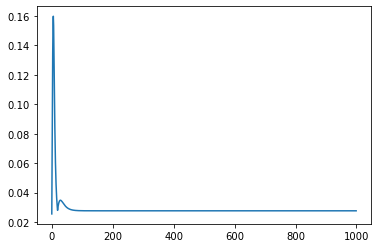

In [21]:
temp = MARL_agent(rewards, s, a, rho, gamma, n, prob_transition, tau=0)
temp.tau = 0.1
temp.step = 1
temp.theta = np.zeros(shape=n* s* a)
prob_record = []
NE_gaps = []
N = 1000
for i in tqdm(range(N)):
#   temp.NPG_entropy_step(verbose=False)
    A_tildes, pi, Pi_global, V_tau, A_tau = temp.NPG_entropy_step_change(verbose=False)
    prob_record.append(pi)
    NEgap = 0
    for agent in range(n):
#         print("r_i",temp.Q_tilde[-1][agent*a:agent*a+a])
#         print()
        cur_gap =  np.max(temp.Q_tilde[-1][agent*a:agent*a+a]) - np.dot(temp.Q_tilde[-1][agent*a:agent*a+a], pi[agent*a:agent*a+a])
        NEgap = max(NEgap, cur_gap)
    
    NE_gaps.append(NEgap)
cur_gap =  np.max(temp.Q_tilde[-1][agent*a:agent*a+a]) - np.dot(temp.Q_tilde[-1][agent*a:agent*a+a], pi[agent*a:agent*a+a])
print(cur_gap)    

print(A_tildes)
print(pi.shape)
# plt.plot(temp.gap)
plt.plot(NE_gaps)
Q_global_star = np.copy(temp.Q_global[-1])
# Q_global: s*A

Q_tilde_star = np.copy(temp.Q_tilde[-1])
pi_star = np.copy(pi)
Pi_global_star = np.copy(Pi_global)

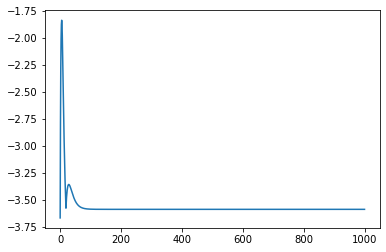

In [23]:
plt.plot(np.log(NE_gaps))


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
[0.69630827 0.20476161 0.67137233 0.79326933 0.04173781 0.96335751
 0.97539272 0.55066078 0.06490698 0.34523679 0.02042997 0.80085181
 0.2079271  0.14325251 0.69989398 0.05794981 0.25660757 0.51033178
 0.99525878 0.14651568 0.44951478 0.60144038 0.09727249 0.28873488
 0.7207999  0.55080606 0.83857702 0.58033135 0.18457174 0.61550212
 0.88695509 0.51678928 0.62614367 0.50505912 0.90966258 0.41330466
 0.53546872 0.34264313 0.12957678 0.66282175 0.93567    0.61272918
 0.8427385  0.21790844 0.90317174 0.00976998 0.22581273 0.13205513
 0.90754295 0.91023064 0.58105791 0.08749305 0.11687944 0.77107126
 0.73279527 0.08712836 0.3574632  0.77321162 0.1314716  0.53783243
 0.75472357 0.27252618 0.566517   0.47668497 0.55662069 0.44073706
 0.69373736 0.71823718 0.75638236 0.03732201 0.6788354  0.4772208
 0.10017139 0.61419623 0.83791451 0.73389404 0.32156558 0.06785531
 0.03733024 0.55912

<ipython-input-17-370d0d38f583>:9: RuntimeWarning: divide by zero encountered in log
  plt.plot((x_range[:stop]), np.log(NE_gaps))


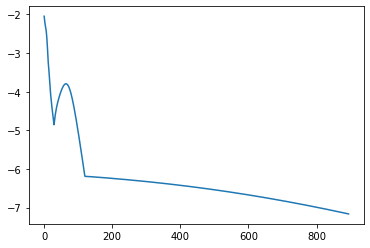

In [17]:
print(Q_tilde_star)
print(reward)
print(pi)
print(temp.gap[-1])
stop = 10000

x_range = np.linspace(0, N, num=N, endpoint=False)
# plt.plot(np.log(x_range[:stop]), np.log(np.abs(temp.gap[:stop] - np.max(reward))))
plt.plot((x_range[:stop]), np.log(NE_gaps))
# plt.plot(np.log(x_range[:stop]), np.log(NE_gaps))
# plt.plot(np.log(x_range[1:stop]), np.log(np.sqrt(1/x_range[1:stop])))
# plt.plot(np.log(x_range[1:stop]), np.log((1/x_range[1:stop])))

# plt.xlim(0,5)

In [117]:
# N = 1000

temp = MARL_agent(rewards, s, a, rho, gamma, n, prob_transition, tau=0.1)
temp.tau = 1
temp.step = 0.01
# temp.theta = np.zeros(shape=n* s* a)
temp.theta = np.random.uniform(0,1, size=n* s* a)

prob_record = []
Pi_global_record = []

dif_pi_Q = []
dif_bound = []
alpha = 1-temp.step*temp.tau/(1-gamma)
print("alpha", alpha)
# xi_global = np.zeros((N, s, A))
N = 300
xi_i = np.zeros((N+1, n, s, a))

# xi_i[0] = 
for state in range(s):
    for agent in range(n):
        for action in range(a):
            xi_i[0,agent, state, action] = np.sum(np.exp(Q_tilde_star[agent*(s*a):(agent+1)*(s*a)]/temp.tau))/a #start at even pi distribution
for i in tqdm(range(N)):
#   temp.NPG_entropy_step(verbose=False)
    A_tildes, pi, Pi_global, V_tau, A_tau = temp.NPG_entropy_step_change(verbose=False)
    prob_record.append(pi)
    Pi_global_record.append(Pi_global)
    
    dif_pi_Q.append(Cal_diff_pi(pi_star,pi,Q_minus_log_pi_star))
    state = 0
    sum_temp = 0
    for agent in range(n):
        sum_temp+=a*np.abs(pi_star[agent*s*a + state*a:agent*s*a + state*a+a] - pi[agent*s*a + state*a:agent*s*a + state*a+a]).max()
    dif_bound.append((Q_minus_log_pi_star.max()-Q_minus_log_pi_star.min())*sum_temp)
#     for state in range(s):
#         for agent in range(n):
#             for action in range(a):
#                 xi_i[i+1,agent, state, action] = xi_i[i,agent, state, action]**alpha*np.exp((1-alpha)* temp.Q_tilde[i][agent*(s*a)+state*a+action] /temp.tau)
#         for global_action in range(A):
#             Q_global = (temp.Q_global[i][state*(a**n)+global_action])

# print(A_tildes)
print(pi.shape)
plt.plot(temp.gap)

  0%|          | 0/300 [00:00<?, ?it/s]

alpha 0.99


NameError: name 'Cal_diff_pi' is not defined

(0.0, 0.01)

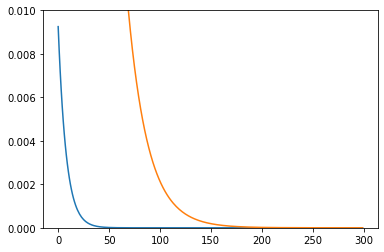

In [52]:
# print(dif_pi_Q)


plt.plot(dif_pi_Q)
plt.plot(dif_bound)
plt.ylim(0,0.01)



In [37]:
def Cal_diff_pi(pi_1, pi_2, vector):
    state = 0
    dist1 = np.zeros((n,a))
    dist2 = np.zeros((n,a))
    Q = vector[state,:]
    for agent in range(n):
        for action in range(a):
            dist1[agent,action] = pi_1[agent*s*a + state*a+action]
            dist2[agent,action] = pi_2[agent*s*a + state*a+action]
        
    weighted_sum = 0
    for global_action in range(A):
        counter = global_action
        prob1 = 1
        prob2 = 1
        for agent in range(n):
            local_action = counter%a
            counter = int(counter/a)
            prob1 *= dist1[agent,local_action]
            prob2 *= dist2[agent,local_action]
        weighted_sum += (prob1-prob2)*Q[global_action]
    return weighted_sum



In [31]:
Q_minus_log_pi = np.zeros(N)
        
state = 0
global_action = 0

# for i in range(N):
#     Q_minus_log_pi[i] = temp.Q_global[i][(state*A)+global_action] - temp.tau*np.log(Pi_global_record[i][state,(state*A)+global_action])
    
    
Q_minus_log_pi_star = np.zeros((s, A))

for state in range(s):
    for global_action in range(A):
        Q_minus_log_pi_star[state, global_action] = Q_global_star[(state*A)+global_action] - temp.tau*np.log(Pi_global_star[state,(state*A)+global_action])

    

In [10]:
# plt.plot(Q_minus_log_pi_star)

11.213787625501395
[12.39929007 12.34866014 12.50152228]
33.048273056408455


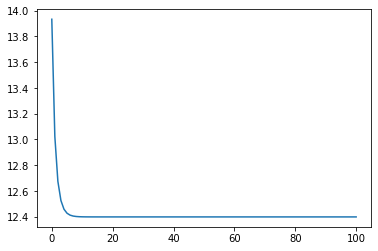

In [16]:
print(temp.Q_global[-1][0])
# for agent in range(n):
#     print("agent", agent)
#     print(temp.Q_tilde[-1][agent*s*a])
# # print(temp.Q_global[-1][0].shape)
print(np.log(xi_i[-2,:,0,0]))

xi_global = np.sum(np.log(xi_i[-2,:,0,0]))
log_pi = 0
for agent in range(n):
    log_pi+= np.log(pi[agent*s*a])
print(xi_global+2*log_pi)
# check monotonicity of tilde{Q}
# plt.plot(temp.Q_global)
# print(temp.Q_tilde[-1].shape)
# plt.plot(temp.Q_tilde-temp.tau*np.log(prob_record))
plt.plot(np.log(xi_i[:,0,0,0]))

local actions: [0 1 1]
global action: 6
state: 3


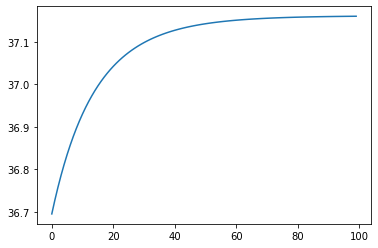

In [38]:
local_actions = np.random.randint(a,size=n)
print("local actions:", local_actions)
global_action = local_actions[0]+local_actions[1]*a+local_actions[2]*a*a
print("global action:", global_action)
state = np.random.randint(s)
print("state:", state)
sum_Q = []
Q_sa = []
for i in range(N):
    Q_tilde_temp = 0
    Q_global_temp = n*(temp.Q_global[i][state*(a**n)+global_action])
    for agent in range(n):
#         Q_tilde_temp += temp.Q_tilde[i][agent*(s*a)+state*a+local_actions[agent]]-temp.tau*np.log(prob_record[i][agent*(s*a)+state*a+local_actions[agent]])
#         Q_global_temp -= temp.tau*np.log(prob_record[i][agent*(s*a)+state*a+local_actions[agent]])
        Q_tilde_temp += temp.Q_tilde[i][agent*(s*a)+state*a+local_actions[agent]]
    sum_Q.append(Q_tilde_temp)
    Q_sa.append(Q_global_temp)
plt.plot(sum_Q)    
# plt.plot(Q_sa)    
# #check monotonicity of V_{tau}
# for i in range(0,len(temp.gap)-1):
#     temp.gap[i] -= temp.gap[i+1]
# plt.plot(temp.gap[0:90])
# print(np.max(temp.gap[0:90]))

In [28]:
# A_tildes, pi, V_tau, A_tau


In [29]:
global_Q = 0
Q_i = 0
index = N-1
state = 2
for action1 in range(a):
    for action2 in range(a):
        for action3 in range(a):
            global_action = action1+action2*a+action3*a*a
            term = temp.Q_global[index][state*(a**n)+global_action]
            global_prob = prob_record[index][state*a+action1]*prob_record[index][s*a+state*a+action2]*prob_record[index][2*s*a+state*a+action3]
            global_Q+= global_prob*(term - temp.tau*np.log(global_prob))
#             global_Q+= global_prob*(A_tau[state*(a**n)+global_action] )
for action in range(a):
    local_prob = prob_record[index][state*a+action]
    term = temp.Q_tilde[index][0*(s*a)+state*a+action]
    Q_i+= local_prob*(term - temp.tau*np.log(local_prob))
#     Q_i+= local_prob*(A_tildes[0][state*a+action])
    
print(global_Q)
print(Q_i)
# print(temp.Q_global[index])
# print(temp.Q_tilde[index])
# print(prob_record[index])



12.782225237549572
12.782225237549572


In [67]:
# approximate optimal value via soft q-iteration
temp_opt = MARL_agent(rewards, s, a, rho, gamma, n, prob_transition, tau=0.1)
temp.step = 0.1
temp.theta = np.zeros(shape=n* s* a)
ell_star, A_tildes_opt, pi_opt, V_tau_opt = temp_opt.solver(typ='global')
print(ell_star)

4.574284635183206


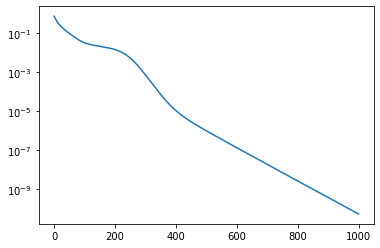

In [25]:
# judge convergence rate via log plot
opt_gap = [ell_star - gap for gap in temp.gap]
plt.axes(yscale='log')
# plt.axes(xscale='log')
plt.plot(opt_gap)

In [28]:
# check middle results
print('Atildes', A_tildes)
print('pi', pi)
print('Vtau', V_tau)
print('Atau', A_tau)
print('test', np.dot(A_tildes[0], pi[0:s*a]))

Atildes [array([-8.92475619e-07, -5.00732273e-07,  1.20632826e-06,  1.11887442e-11,
       -1.43486799e-13,  6.28522131e-12,  1.81127436e-10,  5.81685214e-10,
       -6.26340101e-10, -3.65720184e-07,  7.73524348e-08,  2.60155419e-07,
       -1.03564154e-10,  1.53847518e-11,  3.81342893e-11]), array([ 1.78889939e-07, -2.96956932e-06, -2.75598787e-06, -2.95467692e-13,
        1.06453595e-11,  3.70278135e-12,  6.48413354e-12, -1.19706242e-09,
        3.33064982e-10, -6.88274682e-07, -1.55555671e-07,  1.38194158e-07,
       -1.33388281e-10, -1.40880947e-10,  1.33612954e-11]), array([-2.68332589e-06,  1.54095025e-07, -3.78305037e-06, -1.58565003e-12,
        4.26576895e-12,  8.60854424e-13, -4.29821845e-10,  4.71480639e-10,
       -2.73136344e-10,  1.00110075e-07,  1.61097360e-07, -8.60796319e-08,
       -1.88954036e-10,  1.06419409e-12, -3.42655498e-10])]
pi [2.52778470e-01 3.95882755e-01 3.51338775e-01 1.22255005e-02
 9.87143523e-01 6.30976781e-04 7.52930266e-01 1.52083348e-02
 2.31861399

In [10]:
def cal_Q_tildes(Atildes, Pi, Vtau, tau=0.1):
    Q_tildes = np.zeros(n*s*a)
    for agent in range(n):
        for state in range(s):
            Q_tildes[agent*s*a+state*a:agent*s*a+(state+1)*a] = Atildes[agent][state*a:(state+1)*a] 
            + tau * np.log(Pi[state*a:(state+1)*a]) + Vtau[state]
    return Q_tildes
            
Q_tildes = cal_Q_tildes(A_tildes, pi, V_tau, 0.1)
Q_tildes_opt = cal_Q_tildes(A_tildes_opt, pi_opt, V_tau_opt, 0.1)
print(max(np.abs(Q_tildes - Q_tildes_opt)))

0.00760697948977569


In [11]:
def Q_cal(V, func):
    Q = np.zeros(s * A)
    for i in range(s):
        for j in range(A):
            Q[i * A + j] = func[i * A + j] + gamma * np.matmul(prob_transition[i * A + j], V)
    return Q

Q = Q_cal(V_tau, reward)
Q_opt = Q_cal(V_tau_opt, reward)
print(max(np.abs(Q - Q_opt)))

2.125484575365988e-05


In [5]:
prob = temp.theta_to_policy()
Pi = temp.get_Pi(prob)
mat = np.identity(temp.s * temp.A) - temp.gamma * np.matmul(temp.prob_transition, Pi)
P_theta = np.matmul(Pi, temp.prob_transition) # |S|*|S|
d_pi = (1 - temp.gamma) * np.dot(np.transpose((np.linalg.inv(np.identity(temp.s) - temp.gamma * P_theta))), temp.rho)

print(temp.theta)
print(prob)

[2.32789176 1.42730195 0.         0.17390555 0.35655456 0.38287269
 0.20226845 0.22354205]
[0.71107069 0.28892931 0.45663285 0.54336715 0.49342085 0.50657915
 0.4946818  0.5053182 ]


In [ ]:
N = 500
ax1 = plt.subplot(211)
# ax1.plot(t, np.sin(2*np.pi*t))

ax2 = plt.subplot(212, sharex=ax1)
# ax2.plot(t, np.sin(4*np.pi*t))

for j in range(5):
    temp = MO_MARL(rewards, s, a, rho, gamma, n, prob_transition)
    for i in tqdm(range(N)):
        temp.Centralized_NPG_step(verbose = False)
    ax1.plot(temp.gap)
    ax2.plot(temp.avg_gap)
    
plt.show()
    

 32%|███▏      | 158/500 [00:01<00:02, 140.39it/s]

In [14]:
agent_num = 5
Laplacian = np.zeros((agent_num, agent_num))

for i in range(agent_num):
    Laplacian[i,i] = -2
    Laplacian[i,(i+1)%agent_num] = 1
    Laplacian[i,(i-1)%agent_num] = 1
print(Laplacian)

W = np.zeros((agent_num, agent_num))
eta = 0.1
for i in range(agent_num):
    W[i,i] = 1-2*eta
    W[i,(i+1)%agent_num] = eta
    W[i,(i-1)%agent_num] = eta
print(W)



[[-2.  1.  0.  0.  1.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 1.  0.  0.  1. -2.]]
[[0.8 0.1 0.  0.  0.1]
 [0.1 0.8 0.1 0.  0. ]
 [0.  0.1 0.8 0.1 0. ]
 [0.  0.  0.1 0.8 0.1]
 [0.1 0.  0.  0.1 0.8]]


In [9]:
agent_list = []
for i in range(agent_num):
    agent_list.append(MO_MARL(rewards, s, a, rho, gamma, n, prob_transition))
# for k in range(5):
old_grad = np.zeros((agent_num, reward_num))
grad = np.zeros((agent_num, reward_num))
y = np.zeros((agent_num, reward_num))
all_theta = np.zeros((agent_num, n*s*a))
N = 1000
for k in tqdm(range(N)):
    
    for i in range(agent_num):
        grad[i] = agent_list[i].calculate_G(num=i,verbose = False)
        all_theta[i] = copy.deepcopy(agent_list[i].theta)

    y = W@y+grad-old_grad
#     y = W@grad
#     y = copy.deepcopy(grad)
#     y = y + eta*Laplacian@grad
    old_grad = copy.deepcopy(grad)
    all_theta = W@all_theta
        
    for i in range(agent_num):
        agent_list[i].theta=all_theta[i]
        agent_list[i].NPG_step_given_G(y[i], verbose = False)
        

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:07<00:00,  2.72it/s]


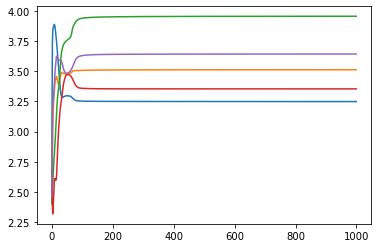

In [10]:
# plt.plot(agent_list[0].Q_record)
plt.plot(agent_list[0].V_record[0])
plt.plot(agent_list[0].V_record[1])
plt.plot(agent_list[0].V_record[2])
plt.plot(agent_list[0].V_record[3])
plt.plot(agent_list[0].V_record[4])

6.313887881586048
6.266685230417442
6.30454248226258
6.367220519322908
6.312252667057926


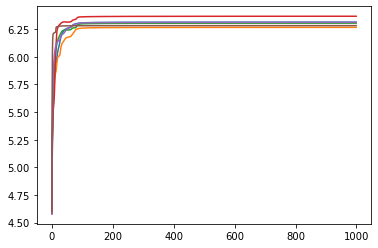

In [13]:
# plt.plot(agent_list[0].gap)

for i in range(agent_num):
    plt.plot(agent_list[i].gap)
    print(agent_list[i].gap[-1])
plt.plot(temp.gap)